In [27]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [28]:
%load_ext blackcellmagic

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [29]:
#2018
from zipfile import ZipFile
directory_18 = r'F:\Ecobee\files\2018_sac'
df_sac_18_daily_midpeak = pd.DataFrame()
hours_to_keep = [12, 13, 14, 15, 16, 20, 21, 22, 23]
import datetime
for filename in os.listdir(directory_18):
    myzip = ZipFile(os.path.join(directory_18, filename))
    g = myzip.open(filename[:-4])
    df_temp = pd.read_csv(g, parse_dates=['DateTime'])
    df_temp1 = df_temp[df_temp.HvacMode=='cool']
    df_temp1['Date'] = df_temp1['DateTime'].dt.date
    df_temp1['user_id'] = filename[:-8]
    df_temp1 = df_temp1[(df_temp1['DateTime'].dt.hour.isin(hours_to_keep)) &
                        (df_temp1['DateTime'].dt.month >= 6) &
                        (df_temp1['DateTime'].dt.month <=
                         9)]  #summer days only
    df_day = (
        df_temp1.groupby([df_temp1['Date']])
        .agg(
            avg_set_point_cool=pd.NamedAgg(column="T_stp_cool", aggfunc=np.mean),
            user_id=pd.NamedAgg(column="user_id", aggfunc=min),
        )
        .reset_index()
    )
    df_sac_18_daily_midpeak = pd.concat([df_sac_18_daily_midpeak, df_day])
    g.close()
    myzip.close()

In [30]:
df_sac_18_daily_midpeak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11919 entries, 0 to 18
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                11919 non-null  object 
 1   avg_set_point_cool  11850 non-null  float64
 2   user_id             11919 non-null  object 
dtypes: float64(1), object(2)
memory usage: 372.5+ KB


In [31]:
from zipfile import ZipFile
df_sac_19_daily_midpeak = pd.DataFrame()
directory_19 = r'F:\Ecobee\files\2019_sac'
hours_to_keep = [12, 13, 14, 15, 16, 20, 21, 22, 23]
import datetime
for filename in os.listdir(directory_19):
    myzip = ZipFile(os.path.join(directory_19, filename))
    f = myzip.open(filename[:-4])
    df_temp = pd.read_csv(f, parse_dates=['DateTime'])
    df_temp1 = df_temp[df_temp.HvacMode=='cool']
    df_temp1['Date'] = df_temp1['DateTime'].dt.date
    df_temp1['user_id'] = filename[:-8]
    df_temp1 = df_temp1[(df_temp1['DateTime'].dt.hour.isin(hours_to_keep)) &
                        (df_temp1['DateTime'].dt.month >= 6) &
                        (df_temp1['DateTime'].dt.month <=
                         9)]  #summer days only
    df_day = (
        df_temp1.groupby(["Date"])
        .agg(
            avg_set_point_cool=pd.NamedAgg(column="T_stp_cool", aggfunc=np.mean),
            user_id=pd.NamedAgg(column="user_id", aggfunc=min),
        )
        .reset_index()
    )
    df_sac_19_daily_midpeak = pd.concat([df_sac_19_daily_midpeak, df_day])
    f.close()
    myzip.close()

In [32]:
df_sac_19_daily_midpeak.head()
#note there is a "time jump" from 2019-07-25 16:55 to 2019-07-26 17:00

,Date,avg_set_point_cool,user_id
0,2019-06-02,77.333333,00e2f68ec737f7480114a67bbef7c5f65b6b8516
1,2019-06-03,77.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516
2,2019-06-04,77.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516
3,2019-06-05,77.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516
4,2019-06-06,77.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516


In [33]:
df_sac_18n19_daily_midpeak=pd.concat([df_sac_18_daily_midpeak,df_sac_19_daily_midpeak])
df_sac_18n19_daily_midpeak.head()

,Date,avg_set_point_cool,user_id
0,2018-06-01,74.946237,00e2f68ec737f7480114a67bbef7c5f65b6b8516
1,2018-06-02,77.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516
2,2018-06-03,77.240741,00e2f68ec737f7480114a67bbef7c5f65b6b8516
3,2018-06-04,78.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516
4,2018-06-05,77.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516


In [34]:
df_sac_18n19_daily_midpeak['count'] = df_sac_18n19_daily_midpeak.groupby('user_id')['user_id'].transform('count')
df_sac_18n19_daily_midpeak['count'].value_counts().reset_index().sort_values('index',ascending=False).head(30)

,index,count
0,244,5368
5,243,729
11,241,482
2,240,1200
6,239,717
7,238,714
32,236,236
33,235,235
34,230,230
13,229,458


In [35]:
df_sac_18n19_daily_midpeak.head()

,Date,avg_set_point_cool,user_id,count
0,2018-06-01,74.946237,00e2f68ec737f7480114a67bbef7c5f65b6b8516,243
1,2018-06-02,77.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,243
2,2018-06-03,77.240741,00e2f68ec737f7480114a67bbef7c5f65b6b8516,243
3,2018-06-04,78.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,243
4,2018-06-05,77.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,243


In [36]:
df_sac_18n19_daily_midpeak=df_sac_18n19_daily_midpeak[df_sac_18n19_daily_midpeak['count']>=220]
df_sac_18n19_daily_midpeak['Date']=pd.to_datetime(df_sac_18n19_daily_midpeak['Date'])
df_sac_18n19_daily_midpeak.head()

,Date,avg_set_point_cool,user_id,count
0,2018-06-01,74.946237,00e2f68ec737f7480114a67bbef7c5f65b6b8516,243
1,2018-06-02,77.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,243
2,2018-06-03,77.240741,00e2f68ec737f7480114a67bbef7c5f65b6b8516,243
3,2018-06-04,78.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,243
4,2018-06-05,77.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,243


In [37]:
df_temperature=pd.read_csv(r'F:\Ecobee\smf_temp_18and19.csv', parse_dates=['DATE'])
df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  730 non-null    object        
 1   NAME     730 non-null    object        
 2   DATE     730 non-null    datetime64[ns]
 3   TAVG     730 non-null    int64         
 4   TMAX     730 non-null    int64         
 5   TMIN     730 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 34.3+ KB


In [38]:
df_temperature.head()

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-01,49,65,38
1,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-02,48,59,39
2,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-03,50,57,40
3,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-04,55,65,49
4,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-05,55,60,50


In [39]:
df_sac_18n19_daily_midpeak_w_temperature=pd.merge(df_sac_18n19_daily_midpeak,df_temperature,how='left', left_on='Date', right_on='DATE')
df_sac_18n19_daily_midpeak_w_temperature.head()

,Date,avg_set_point_cool,user_id,count,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,2018-06-01,74.946237,00e2f68ec737f7480114a67bbef7c5f65b6b8516,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-01,65,86,49
1,2018-06-02,77.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-02,74,96,55
2,2018-06-03,77.240741,00e2f68ec737f7480114a67bbef7c5f65b6b8516,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-03,78,98,58
3,2018-06-04,78.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-04,76,89,58
4,2018-06-05,77.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-05,67,84,53


In [40]:
df_sac_18n19_daily_midpeak_w_temperature[
    'TAVG_less_62'] = df_sac_18n19_daily_midpeak_w_temperature['TAVG'] - 62
df_sac_18n19_daily_midpeak_w_temperature['TAVG_less_62'] = df_sac_18n19_daily_midpeak_w_temperature['TAVG_less_62'].apply(lambda x : x if x > 0 else 0)

In [41]:
df_sac_18n19_daily_midpeak_w_temperature['y2019']=np.where(df_sac_18n19_daily_midpeak_w_temperature['Date'].dt.year== 2019, 1, 0)
# [df_sac_18n19_daily_midpeak_w_temperature['Date'].dt.year==2019]
df_sac_18n19_daily_midpeak_w_temperature.describe()

,avg_set_point_cool,count,TAVG,TMAX,TMIN,TAVG_less_62,y2019
count,12315.000000,12401.000000,12401.000000,12401.000000,12401.000000,12401.000000,12401.000000
mean,77.517172,238.682768,72.821789,90.490848,58.579066,10.853560,0.502701
std,4.250683,6.833787,5.152561,7.170590,3.972169,5.073874,0.500013
min,65.500000,223.000000,58.000000,69.000000,45.000000,0.000000,0.000000
25%,74.500000,236.000000,69.000000,86.000000,56.000000,7.000000,0.000000
50%,77.564815,241.000000,73.000000,91.000000,58.000000,11.000000,1.000000
75%,79.787037,244.000000,77.000000,96.000000,61.000000,15.000000,1.000000
max,92.000000,244.000000,86.000000,105.000000,69.000000,24.000000,1.000000


In [42]:
df_sac_18n19_daily_midpeak_w_temperature[
    'interaction'] = df_sac_18n19_daily_midpeak_w_temperature[
        'TAVG_less_62'] * df_sac_18n19_daily_midpeak_w_temperature['y2019']

In [43]:
import statsmodels.api as sm


def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit(cov_type='HC1')
    return result.params


#This is what you need
results=df_sac_18n19_daily_midpeak_w_temperature.groupby('user_id').apply(
    regress, 'avg_set_point_cool', ['TAVG_less_62','interaction']).reset_index()
results.head(10)

,user_id,TAVG_less_62,interaction,intercept
0,00e2f68ec737f7480114a67bbef7c5f65b6b8516,-0.015967,0.056529,77.016336
1,0614c5d47de23d61b21be2141907668a54bf45a0,0.131861,-0.351600,74.963086
2,0773f65bc76833bddd55f0f850ded5d14bc8ab99,NaN,NaN,NaN
3,084a2b8c0522a36209d062d852d04bb64494ea84,-0.133762,0.106671,80.124789
4,0ed748d62777165f02e04693fa57812603a16fa7,-0.088083,0.101936,70.778443
5,0f50223ca3a7c1def87d95d3696719692d5d3d33,-0.062636,0.102412,79.183901
6,138d3e21dc03b5b4bd5d3063859d11ad3bbac2fb,-0.228128,0.113074,78.420102
7,1498973dc91f1608b32e7cd1ff11ea8e4b5d94b5,NaN,NaN,NaN
8,186741f3ed099caff39bf2194448a8c9d661872d,-0.051754,-0.010831,77.328544
9,1a85f6383418f7b3351f3ea3356f6fdc0875db6f,NaN,NaN,NaN


In [44]:
# creat temperature bins
df_sac_18n19_daily_midpeak_w_temperature["temp_bins"] = pd.cut(
    df_sac_18n19_daily_midpeak_w_temperature["TAVG"],
    bins=[57, 62, 66, 70, 74, 78, 82, 86],
    right=True,
)
df_sac_18n19_daily_midpeak_w_temperature["coded_bins"] = pd.cut(
    df_sac_18n19_daily_midpeak_w_temperature["TAVG"],
    bins=[57, 62, 66, 70, 74, 78, 82, 86],
    right=True,
    labels=['1', '2', '3', '4', '5', '6', '7']
)

In [45]:
df_sac_18n19_daily_midpeak_w_temperature.head()

,Date,avg_set_point_cool,user_id,count,STATION,NAME,DATE,TAVG,TMAX,TMIN,TAVG_less_62,y2019,interaction,temp_bins,coded_bins
0,2018-06-01,74.946237,00e2f68ec737f7480114a67bbef7c5f65b6b8516,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-01,65,86,49,3,0,0,"(62, 66]",2
1,2018-06-02,77.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-02,74,96,55,12,0,0,"(70, 74]",4
2,2018-06-03,77.240741,00e2f68ec737f7480114a67bbef7c5f65b6b8516,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-03,78,98,58,16,0,0,"(74, 78]",5
3,2018-06-04,78.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-04,76,89,58,14,0,0,"(74, 78]",5
4,2018-06-05,77.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-05,67,84,53,5,0,0,"(66, 70]",3


In [46]:
list_of_temp_bins=df_sac_18n19_daily_midpeak_w_temperature["temp_bins"].unique()
# list_of_temp_bins=list_of_temp_bins.tolist()
# list_of_temp_bins.sort()
list_of_temp_bins

[(62, 66], (70, 74], (74, 78], (66, 70], (57, 62], (82, 86], (78, 82]]
Categories (7, interval[int64]): [(57, 62] < (62, 66] < (66, 70] < (70, 74] < (74, 78] < (78, 82] < (82, 86]]

In [47]:
list_of_coded_bins=df_sac_18n19_daily_midpeak_w_temperature["coded_bins"].unique()
print(type(list_of_coded_bins))
list_of_coded_bins

<class 'pandas.core.arrays.categorical.Categorical'>


['2', '4', '5', '3', '1', '7', '6']
Categories (7, object): ['1' < '2' < '3' < '4' < '5' < '6' < '7']

In [48]:
list_of_coded_bins=list_of_coded_bins.tolist()
list_of_coded_bins.sort()
list_of_coded_bins

['1', '2', '3', '4', '5', '6', '7']

In [49]:
df_sac_18n19_daily_midpeak_w_temperature["const"] = 1
list_of_results=[]
for coded_bin in list_of_coded_bins:
    reg_data = df_sac_18n19_daily_midpeak_w_temperature[
        df_sac_18n19_daily_midpeak_w_temperature["coded_bins"] == coded_bin]
    current_reg=sm.OLS(endog=reg_data['avg_set_point_cool'], \
              exog=reg_data[['TAVG_less_62','interaction','const']], \
                missing='drop')
    current_regresult =  current_reg.fit()#fit(cov_type='HC1')
    print('Results for Bin '+str(coded_bin)*20)
    print('\n')
    print(current_regresult.summary())
    print('\n')
    print('\n')
    list_of_results.append(current_regresult)

Results for Bin 11111111111111111111


                            OLS Regression Results                            
Dep. Variable:     avg_set_point_cool   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 19 Apr 2021   Prob (F-statistic):                nan
Time:                        23:04:24   Log-Likelihood:                -548.62
No. Observations:                 182   AIC:                             1099.
Df Residuals:                     181   BIC:                             1102.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
TAVG_less

In [50]:
interaction_coeffs=[]
for i in range(7):
    interaction_coeffs.append(list_of_results[i].params[1])
print(interaction_coeffs)
interaction_coeff_se = []
for i in range(7):
    interaction_coeff_se.append(list_of_results[i].bse[1])
print(interaction_coeff_se)
interaction_coeffs_plusSE = [
    a + b for a, b in zip(interaction_coeffs, interaction_coeff_se)
]
print(interaction_coeffs_plusSE)
interaction_coeffs_minusSE = [
    a - b for a, b in zip(interaction_coeffs, interaction_coeff_se)
]
print(interaction_coeffs_minusSE)

[0.0, 0.03153803136754707, 0.013020207304376417, 0.00781080535402825, -0.0050775594449828775, 0.006806777244516745, -0.00800494944122053]
[0.0, 0.09208513390660832, 0.026184209772936066, 0.013276007525131795, 0.010503015345206167, 0.012953915743966177, 0.032616154396275146]
[0.0, 0.12362316527415539, 0.03920441707731248, 0.021086812879160047, 0.005425455900223289, 0.019760692988482924, 0.024611204955054616]
[0.0, -0.060547102539061246, -0.013164002468559649, -0.005465202171103545, -0.015580574790189044, -0.006147138499449431, -0.040621103837495676]


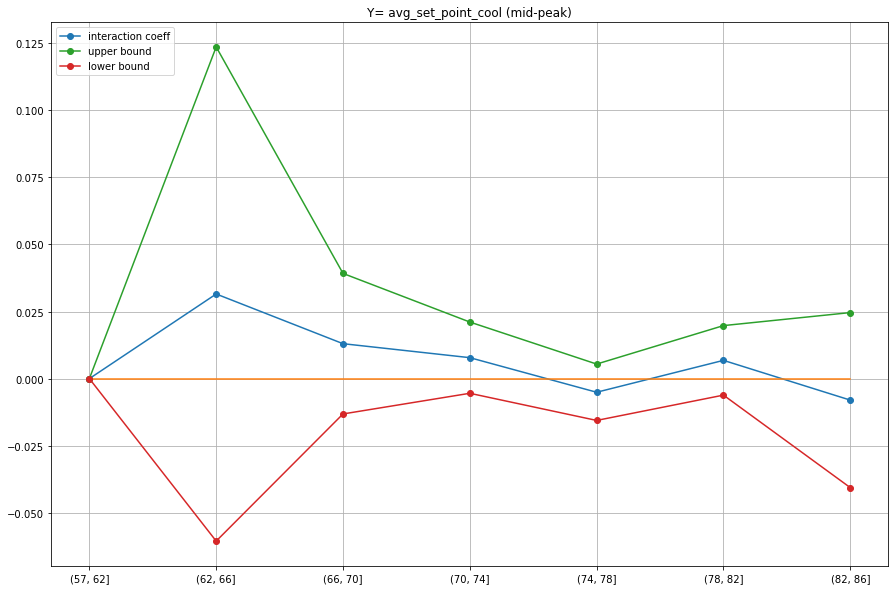

In [51]:
# x axis range
x = range(len(interaction_coeffs))
plt.figure(figsize=(15,10))
# y
plt.plot(x,interaction_coeffs,'o-', label='interaction coeff')
plt.plot(x,[0] * len(interaction_coeffs))
plt.plot(x,interaction_coeffs_plusSE,'o-', label='upper bound')
plt.plot(x,interaction_coeffs_minusSE,'o-', label='lower bound')
plt.legend(loc="upper left")
plt.xticks(x,('(57, 62]', '(62, 66]', '(66, 70]', '(70, 74]', '(74, 78]', '(78, 82]',  '(82, 86]') )
plt.grid()
plt.title("Y= avg_set_point_cool (mid-peak)")
plt.show()

higher set point , especially when cooler outside (did they set high and leave it there?)